<a href="https://colab.research.google.com/github/someshsingh22/News-Propaganda-Detection/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTS

In [40]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/somesh/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### LOAD DATA

In [34]:
directory='datasets/train-task2-TC.labels'
props_=open(directory).read().split('\n')[:-1]
sentences, labels, ids=[],[],[]
for prop in props_:
    prop_=prop.split('\t')
    x,y=int(prop_[2]),int(prop_[3])
    sentences.append(open('datasets/train-articles/article{}.txt'.format(prop_[0])).read()[x:y])
    labels.append(prop_[1])
    ids.append(int(prop_[0]))

### DATA DISTRIBUTION

In [35]:
# General 
df=pd.DataFrame({'Sentence':sentences, 'Label':labels, 'ids':ids,}).drop_duplicates()
df['Words']=df['Sentence'].str.count(' ')+1
df.describe()

ids        Words
count  5.826000e+03  5826.000000
mean   7.553961e+08     8.278579
std    1.309901e+08    10.773396
min    1.111111e+08     1.000000
25%    7.289730e+08     2.000000
50%    7.651970e+08     4.000000
75%    7.837027e+08    10.000000
max    9.990020e+08   133.000000

In [4]:
df.groupby(['Label']).describe()

Words                                    \
                                     count       mean        std  min    25%   
Label                                                                          
Appeal_to_Authority                  144.0  22.965278  21.428173  2.0  10.00   
Appeal_to_fear-prejudice             289.0  16.743945  12.487640  1.0   6.00   
Bandwagon,Reductio_ad_hitlerum        71.0  16.366197  12.287321  2.0   7.00   
Black-and-White_Fallacy              104.0  18.230769  12.469170  2.0   8.75   
Causal_Oversimplification            207.0  21.376812  12.308851  3.0  13.00   
Doubt                                491.0  20.908350  15.760508  1.0   9.00   
Exaggeration,Minimisation            444.0   7.484234   5.768070  1.0   3.00   
Flag-Waving                          196.0  11.964286  11.805855  1.0   3.00   
Loaded_Language                     1928.0   4.008299   4.593144  1.0   2.00   
Name_Calling,Labeling                973.0   4.071942   3.377632  1.0   2.00   
Repetition                           392.0   3.563776   4.042108  1.0   1.00   
Slogans                              113.0   4.522124   2.588082  1.0   3.00   
Thought-terminating_Cliches           73.0   5.808219   3.691798  1.0   3.00   
Whataboutism,Straw_Men,Red_Herring   102.0  16.568627  11.380468  1.0   8.00   

                                                        
                                     50%    75%    max  
Label                                                   
Appeal_to_Authority                 16.0  28.50  127.0  
Appeal_to_fear-prejudice            13.0  24.00   72.0  
Bandwagon,Reductio_ad_hitlerum      13.0  21.00   59.0  
Black-and-White_Fallacy             16.0  23.00   55.0  
Causal_Oversimplification           19.0  28.00   70.0  
Doubt                               17.0  29.00  133.0  
Exaggeration,Minimisation            6.0  10.00   40.0  
Flag-Waving                          8.5  17.00   72.0  
Loaded_Language                      3.0   5.00   88.0  
Name_Calling,Labeling                3.0   5.00   28.0  
Repetition                           2.0   4.00   30.0  
Slogans                              4.0   5.00   15.0  
Thought-terminating_Cliches          5.0   7.00   20.0  
Whataboutism,Straw_Men,Red_Herring  15.0  22.75   71.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

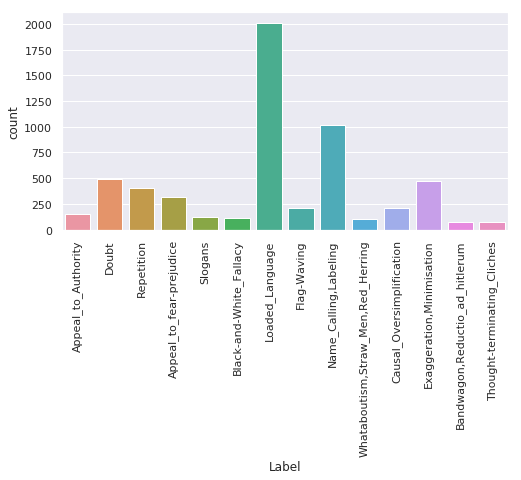

In [5]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)

### PROPAGANDA SPLIT

In [6]:
props=dict()
for i in set(df['Label']):
    props[i]=df[df['Label']==i]

### PROP-Comparisions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

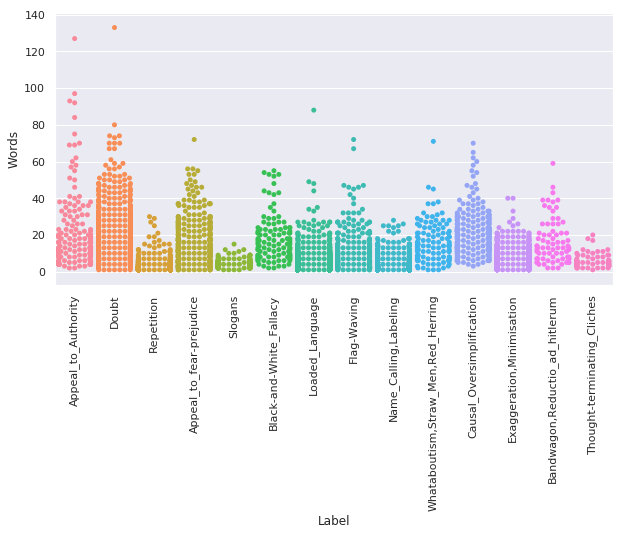

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.swarmplot(x='Label', y='Words', data=df)
plt.xticks(rotation=90)

In [7]:
data_percentiles=dict()
for propaganda in props.keys():
    lens=[]
    for i in range(1,100):
        lens.append(int(props[propaganda].quantile(i/100)))
    data_percentiles[propaganda]=lens
data_percentiles=pd.DataFrame(data_percentiles)

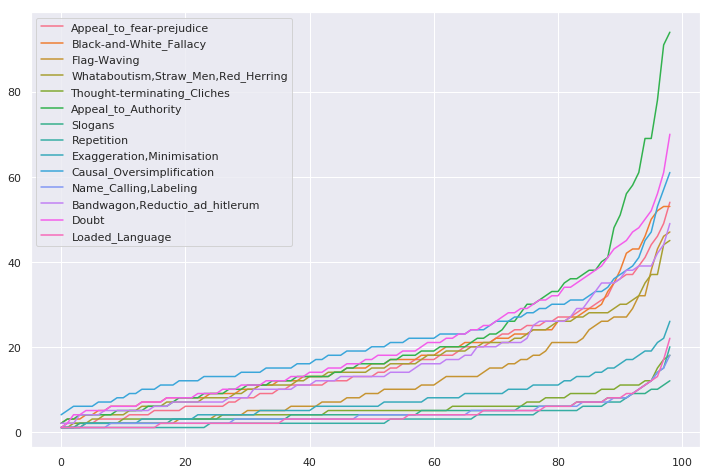

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=data_percentiles,dashes=False)

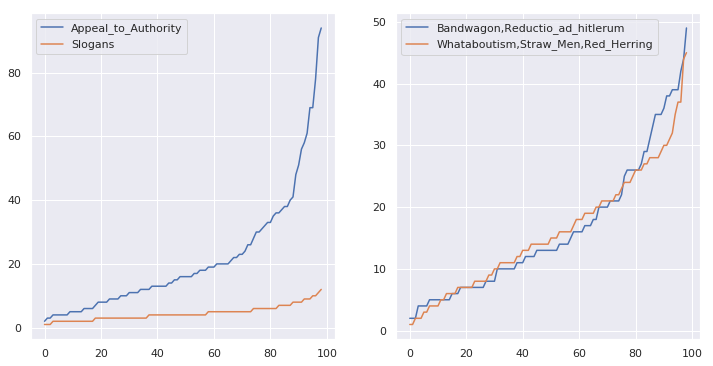

In [9]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
options=[['Appeal_to_Authority','Slogans'],['Bandwagon,Reductio_ad_hitlerum','Whataboutism,Straw_Men,Red_Herring']]
sns.lineplot(data=data_percentiles[options[0]],dashes=False ,ax=ax[0])
sns.lineplot(data=data_percentiles[options[1]],dashes=False ,ax=ax[1])

In [10]:
Types=list(set(df['Label']))
fig, ax = plt.subplots(ncols=14,nrows=14,figsize=(256,256))
for x in range(14):
    for y in range(14):
        if not x==y:
            options=[Types[x],Types[y]]
            sns.lineplot(data=data_percentiles[options],dashes=False, ax=ax[x,y])
            sns.lineplot(data=data_percentiles[options],dashes=False, ax=ax[y,x])

In [55]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [54]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0MB 989kB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 194kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 122kB 2.5MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019929 sha256=8775881a6e465f37710d235c07565bfbe2c5ff3409237af68aa4e47af8a4fe22
  Stored in directory: /home/somesh/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.6/dist-packages/blis-0.4.1.dist-info'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'pip install --upgrade pip' co

In [49]:
ex

'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'